In [43]:
#Imports

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np


In [44]:
db = pd.read_csv('BankChurners.csv')
colunasRemover = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

# Dropar as colunas
db = db.dropna()
db = db.drop(colunasRemover, axis=1)
db.info()
db.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [45]:
selected_columns = ['Customer_Age', 'Gender', 'Attrition_Flag', 'Education_Level', 'Credit_Limit', 'Marital_Status', 'Avg_Open_To_Buy', 'Income_Category']
filtered_data = db[selected_columns]
data_encoded = pd.get_dummies(filtered_data, columns=['Gender', 'Attrition_Flag', 'Education_Level', 'Marital_Status', 'Income_Category'])

scaler = StandardScaler()
data_encoded[['Customer_Age', 'Avg_Open_To_Buy', 'Credit_Limit']] = scaler.fit_transform(data_encoded[['Customer_Age', 'Avg_Open_To_Buy', 'Credit_Limit']])

# Visualizando as primeiras linhas dos dados codificados e normalizados
data_encoded.head()


,Customer_Age,Credit_Limit,Avg_Open_To_Buy,Gender_F,Gender_M,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown
0,-0.165406,0.446622,0.488971,False,True,False,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False
1,0.333570,-0.041367,-0.008486,True,False,False,True,False,False,True,...,False,False,True,False,False,False,False,False,True,False
2,0.583058,-0.573698,-0.445658,False,True,False,True,False,False,True,...,False,True,False,False,False,False,False,True,False,False
3,-0.789126,-0.585251,-0.734100,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,-0.789126,-0.430877,-0.302868,False,True,False,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False


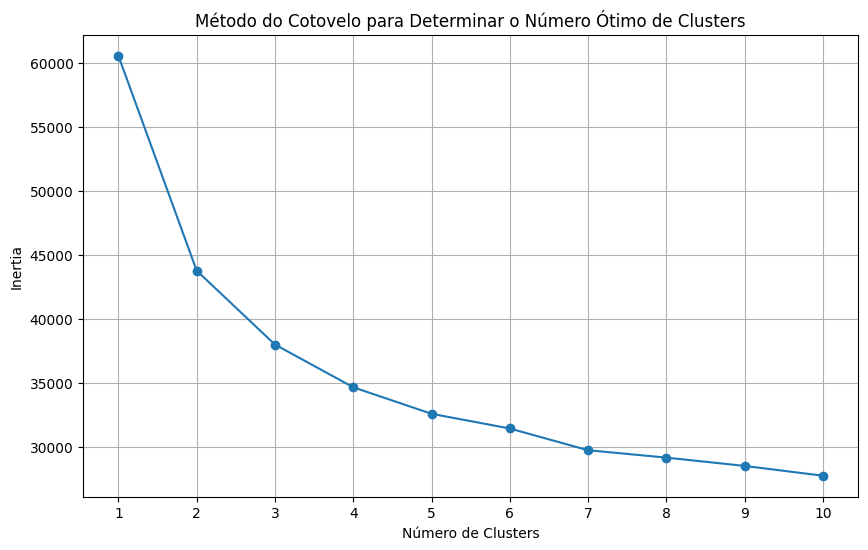

In [46]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_encoded)
    inertia.append(kmeans.inertia_)

# Plotando o método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo para Determinar o Número Ótimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [47]:
# Aplicando o método k-means para os dados do conjunto de dados
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data_encoded)

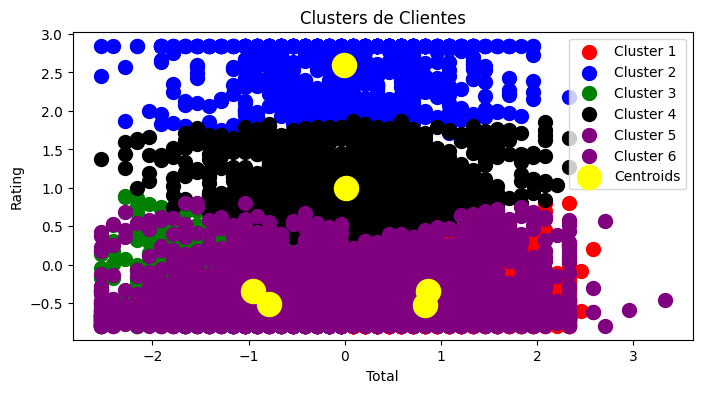

In [48]:
#Plotando os clusters
plt.figure(figsize=(8, 4))
plt.scatter(data_encoded.iloc[pred_y == 0, 0], data_encoded.iloc[pred_y == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_encoded.iloc[pred_y == 1, 0], data_encoded.iloc[pred_y == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_encoded.iloc[pred_y == 2, 0], data_encoded.iloc[pred_y == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(data_encoded.iloc[pred_y == 3, 0], data_encoded.iloc[pred_y == 3, 1], s=100, c='black', label='Cluster 4')
plt.scatter(data_encoded.iloc[pred_y == 4, 0], data_encoded.iloc[pred_y == 4, 1], s=100, c='purple', label='Cluster 5')
plt.scatter(data_encoded.iloc[pred_y == 5, 0], data_encoded.iloc[pred_y == 5, 1], s=100, c='purple', label='Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters de Clientes')
plt.xlabel('Total')
plt.ylabel('Rating')
plt.legend()
plt.show()